In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver, legend_outside
import gas_phase_data
import numpy as np
import apogee_analysis as aah
from vice_utils import load_model

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import sys
sys.path.append("../")
import surp
import multizone_sim
import vice
import pickle
from vice_to_pickle import vice_model, pickle_output
import pandas as pd

In [4]:
def find_model(name=None, agb="cristallo11", eta="1", f_agb="0.2", beta="0"):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if name is None:
        name = agb + "_f" + f_agb + "_Z" + beta + "_eta" + eta 
    pickle_name = "pickles/" + name + ".pickle"
    return vice_model.from_file(pickle_name)

In [5]:
def compare_cooh(models):
    name_0 = list(models.keys())[0]
    for name, model in models.items():
        model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), label=name, plot_data=name==name_0)
    legend_outside()

In [6]:
def compare_coofe(models):
    name_0 = list(models.keys())[0]

    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o)
        plt.title("[O/H] = %1.1f" % o)
        legend_outside()  
        plt.show()

In [7]:
def compare_mdf(models):
    for ratio in ["[o/h]", "[fe/h]", "[o/fe]", "[c/o]", "[c/h]"]:
        for name, model in models.items():
            model.plot_mdf(ratio, label = name, xlim=(-1.5, 1))
        legend_outside()
        plt.show()

In [8]:
def compare(model_names, labels=None):
    if labels is None:
        labels = model_names
        
    models = {label: find_model(name=name) for label, name in zip(labels, model_names)}
    compare_cooh(models)
    plt.show()
    compare_coofe(models)
    compare_mdf(models)

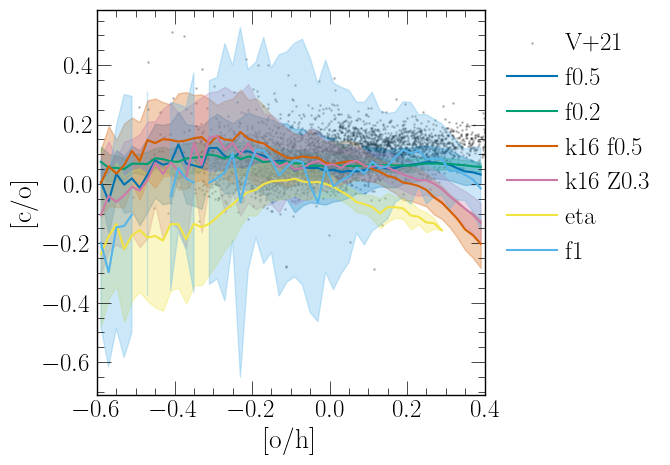

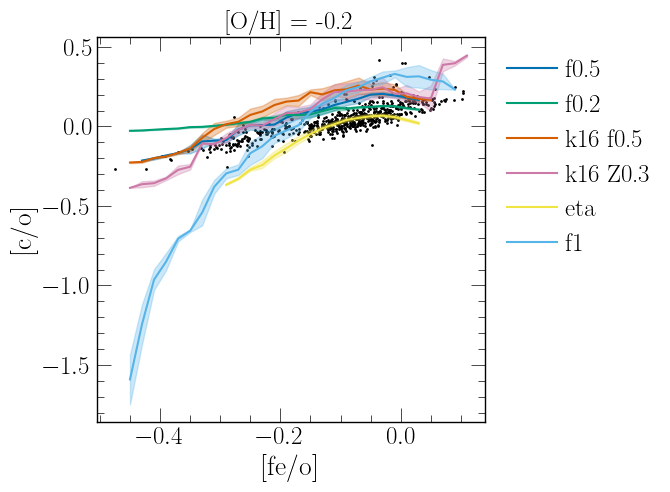

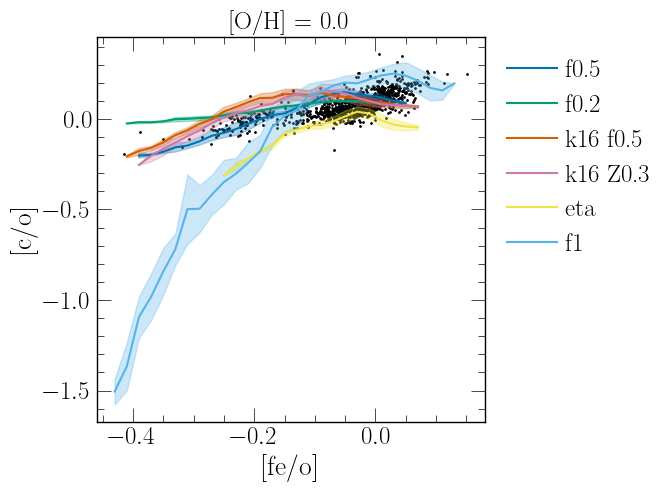

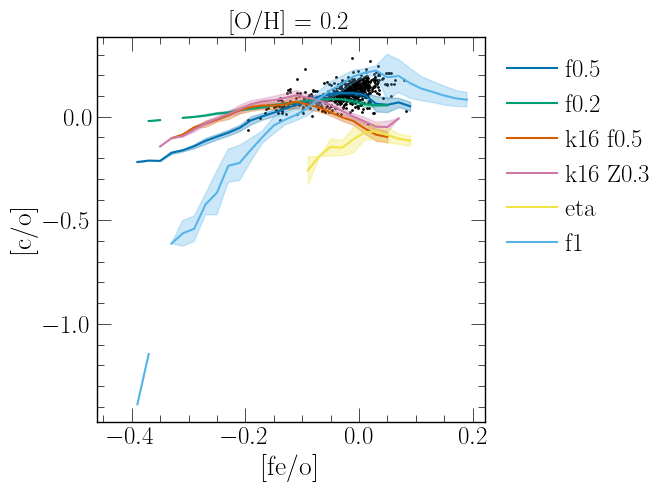

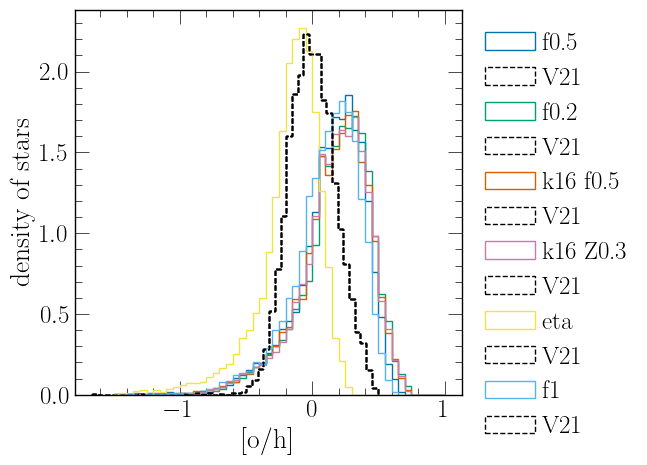

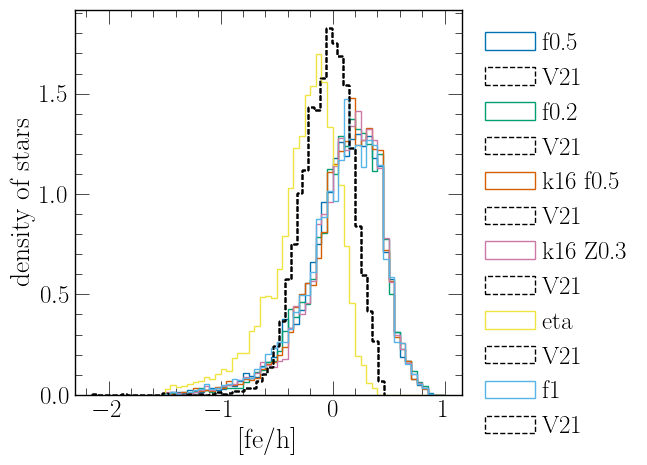

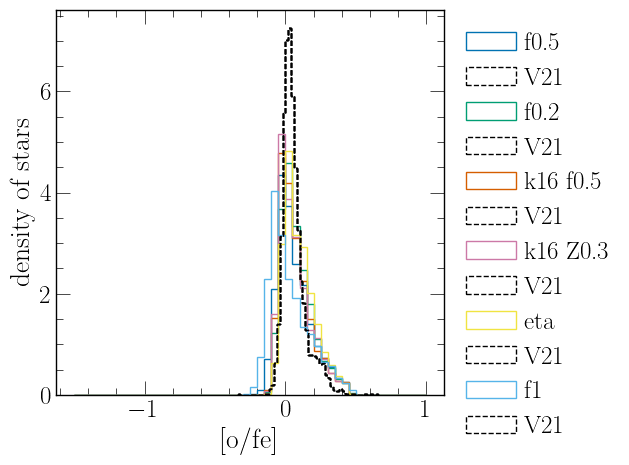

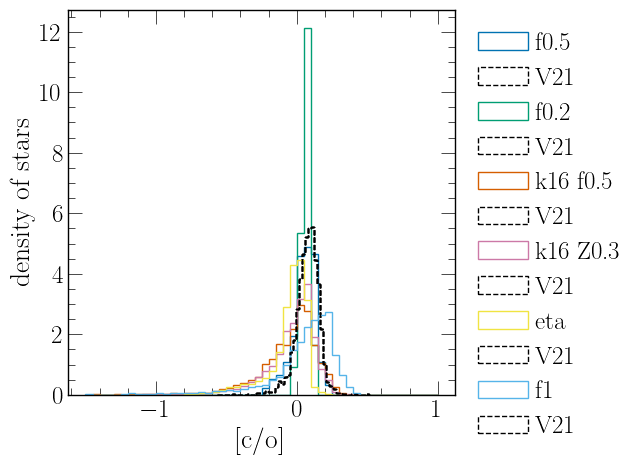

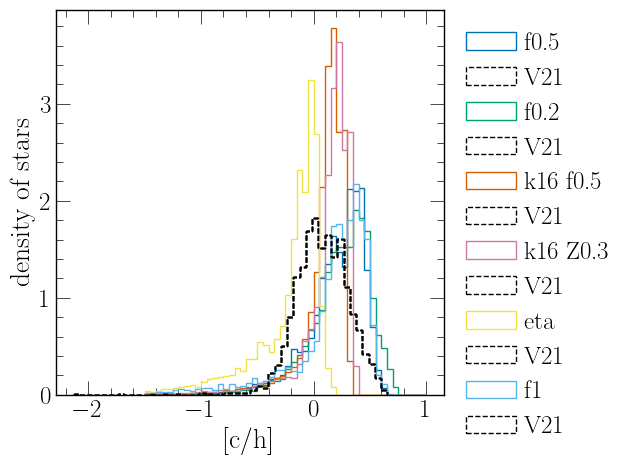

In [21]:
compare(["cristallo11_f0.5_Z0_eta1", "cristallo11_f0.2_Z0_eta1", "karakas16_f0.5_Z0_eta1", "karakas16_f0.5_Z0.3_eta1", "cristallo11_f0.5_Z0_eta0.3", "cristallo11_f1_Z1_eta1"], labels=["f0.5", "f0.2", "k16 f0.5", "k16 Z0.3", "eta", "f1"])